In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("IndiaPopulation.csv")

In [3]:
df.head()


,Year,Population,GrowthRate
0,2011,1250287943,1.30
1,2010,1234281170,1.36
2,2009,1217726215,1.42
3,2008,1200669765,1.48
4,2007,1183209472,1.52


# New Section

In [4]:
plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        62 non-null     int64  
 1   Population  62 non-null     int64  
 2   GrowthRate  62 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.6 KB


In [6]:
df = df.sort_values(by='Year')
df = df.reset_index(drop=True)
df.head()

,Year,Population,GrowthRate
0,1950,376325200,0.00
1,1951,382376948,1.61
2,1952,388799073,1.68
3,1953,395544369,1.73
4,1954,402578596,1.78


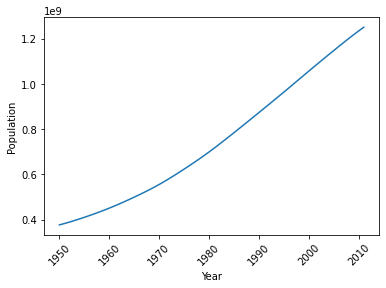

In [7]:
plt.plot(df.Year,df.Population)
plt.xlabel("Year")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.savefig("img1.jpg")


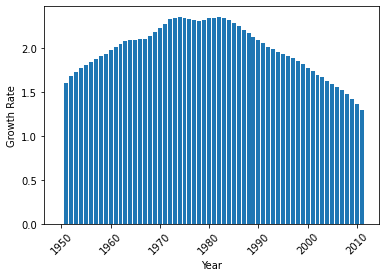

In [8]:
plt.bar(df['Year'],df['GrowthRate'])
plt.xlabel("Year")
plt.ylabel("Growth Rate")
plt.xticks(rotation=45)
plt.savefig("img2.jpg")

# For Normalization

In [9]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from sklearn.linear_model import LinearRegression

In [10]:
df.head()

,Year,Population,GrowthRate
0,1950,376325200,0.00
1,1951,382376948,1.61
2,1952,388799073,1.68
3,1953,395544369,1.73
4,1954,402578596,1.78


In [11]:
lr = LinearRegression()
X = df[['Year']]
Y = df[['Population']]
model = lr.fit(X, Y)

In [27]:
Pred_X = pd.DataFrame(list(range(1950,2012)),columns=['Year'])
Pred_X['Prediction'] = model.predict(Pred_X[['Year']])

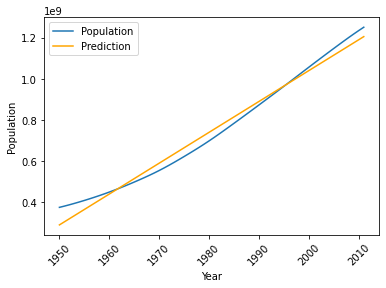

In [28]:
plt.plot(df.Year,df.Population,label = "Population")
plt.plot(Pred_X.Year,Pred_X.Prediction, label = "Prediction",color='orange')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.savefig("img3.jpg")

In [29]:
compare_y_ypred = pd.DataFrame()
compare_y_ypred['Input'] = Y.values.flatten()[0:62]
compare_y_ypred["ModelPrediction"] = Pred_X['Prediction'].values.flatten()[0:62]

In [42]:
compare_y_ypred.to_csv('linearRegression.csv', index=False)

Polynomial Model

In [16]:
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
  
poly.fit(X_poly, Y)
lin = LinearRegression()
lin.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

No handles with labels found to put in legend.


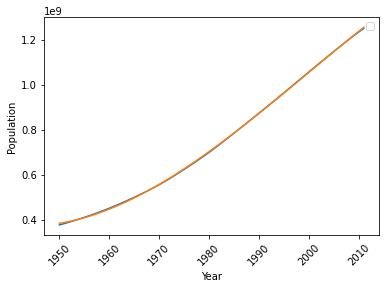

In [39]:
plt.plot(X, Y)
plt.plot(X[0:62], lin.predict(poly.fit_transform(X[0:62])))
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.savefig("img4.jpg")


In [40]:
compare_y_ypred = pd.DataFrame()
compare_y_ypred['Input'] = Y.values.flatten()[0:62]
compare_y_ypred["ModelPrediction"] = lin.predict(poly.fit_transform(X))[0:62]

In [41]:
compare_y_ypred.head(61)
compare_y_ypred.to_csv('polynomial.csv', index=False)

Prediction


In [20]:
pred=lin.predict(poly.fit_transform(pd.DataFrame(list(range(2011,2031)))))
df1=pd.DataFrame(list(range(2011,2031)),columns=['Year'])
df1["pred"]=pred
df1


,Year,pred
0,2011,1255177977.43
1,2012,1272904824.30
2,2013,1290492832.34
3,2014,1307929826.26
4,2015,1325203612.81
5,2016,1342301980.82
6,2017,1359212701.22
7,2018,1375923526.99
8,2019,1392422193.21
9,2020,1408696417.03


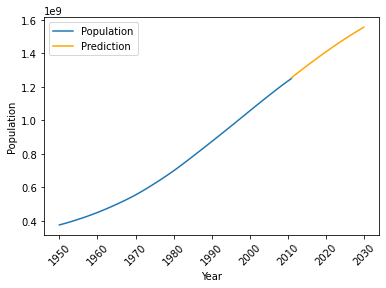

In [21]:
plt.plot(df.Year,df.Population,label = "Population")
plt.plot(df1.Year,df1.pred,color='orange',label="Prediction")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.savefig("img5.jpg")
